In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-bpower-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_7/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict['ms'] = Uniform(5.0, 15.0, name='$m_*$')
prior_dict['α1'] = Uniform(0.0, 80.0, name='$\\alpha_1$')
prior_dict['α2'] = Uniform(1.0, 3.0, name='$\\alpha_2$')
prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict


{'ms': Uniform(minimum=5.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0.0, maximum=80.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-3.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

19:15 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-bpower-1st_flatLCDM_7/'
19:15 bilby INFO    : Search parameters:
19:15 bilby INFO    :   ms = Uniform(minimum=5.0, maximum=15.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
19:15 bilby INFO    :   α1 = Uniform(minimum=0.0, maximum=80.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
19:15 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=3.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
19:15 bilby INFO    :   log_fpbh = Uniform(minimum=-3.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
19:15 bilby INFO    :   H0 = 67.4
19:15 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


19:16 bilby INFO    : Single likelihood evaluation took 1.640e-01 s


0it [00:00, ?it/s]

19:16 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fe896dead00>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
19:16 bilby INFO    : Checkpoint every check_point_delta_t = 60s
19:16 bilby INFO    : Using dynesty version 1.0.1
19:16 bilby INFO    : Using the bilby-implemented rwalk sampl

1299it [03:49,  9.36it/s, bound:0 nc: 10 ncall:6.6e+03 eff:19.8% logz=-1824.40+/-0.15 dlogz:54.649>0.1]    

19:20 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1613it [05:02,  2.48it/s, bound:0 nc: 81 ncall:1.3e+04 eff:12.6% logz=-1803.89+/-0.14 dlogz:33.443>0.1]

19:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1812it [06:12,  2.43s/it, bound:1 nc: 39 ncall:1.8e+04 eff:10.0% logz=-1796.97+/-0.15 dlogz:26.109>0.1]

19:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2056it [07:18,  3.63it/s, bound:21 nc: 25 ncall:2.4e+04 eff:8.4% logz=-1790.46+/-0.15 dlogz:19.340>0.1]

19:23 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2274it [08:23,  3.21it/s, bound:40 nc: 21 ncall:3.0e+04 eff:7.5% logz=-1786.06+/-0.15 dlogz:14.492>0.1]

19:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2502it [09:30,  3.35it/s, bound:60 nc: 56 ncall:3.7e+04 eff:6.8% logz=-1783.17+/-0.15 dlogz:11.583>0.1]

19:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2707it [10:34,  3.30it/s, bound:79 nc: 30 ncall:4.3e+04 eff:6.3% logz=-1781.24+/-0.15 dlogz:9.240>0.1] 

19:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2904it [11:41,  2.92it/s, bound:99 nc: 36 ncall:4.9e+04 eff:5.9% logz=-1779.87+/-0.15 dlogz:7.770>0.1]

19:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3113it [12:51,  2.97it/s, bound:121 nc: 75 ncall:5.7e+04 eff:5.5% logz=-1778.80+/-0.15 dlogz:6.518>0.1]

19:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3294it [13:52,  3.03it/s, bound:141 nc: 33 ncall:6.3e+04 eff:5.2% logz=-1778.02+/-0.16 dlogz:5.381>0.1]

19:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3502it [15:02,  2.90it/s, bound:163 nc: 28 ncall:7.0e+04 eff:5.0% logz=-1777.33+/-0.16 dlogz:4.280>0.1]

19:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3673it [16:03,  2.83it/s, bound:182 nc: 31 ncall:7.6e+04 eff:4.8% logz=-1776.88+/-0.16 dlogz:3.604>0.1]

19:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3847it [17:07,  2.70it/s, bound:204 nc: 40 ncall:8.3e+04 eff:4.6% logz=-1776.53+/-0.16 dlogz:2.996>0.1]

19:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:33 bilby INFO    : Writing 104 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4029it [18:11,  2.82it/s, bound:225 nc: 35 ncall:9.0e+04 eff:4.5% logz=-1776.25+/-0.16 dlogz:2.393>0.1]

19:34 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:34 bilby INFO    : Writing 155 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4195it [19:18,  2.59it/s, bound:247 nc: 37 ncall:9.7e+04 eff:4.3% logz=-1776.04+/-0.16 dlogz:1.920>0.1]

19:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:35 bilby INFO    : Writing 238 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4367it [20:22,  2.76it/s, bound:269 nc: 67 ncall:1.0e+05 eff:4.2% logz=-1775.85+/-0.16 dlogz:1.489>0.1]

19:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:36 bilby INFO    : Writing 296 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4520it [21:28,  2.49it/s, bound:289 nc: 40 ncall:1.1e+05 eff:4.1% logz=-1775.71+/-0.16 dlogz:1.242>0.1]

19:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:37 bilby INFO    : Writing 406 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4689it [22:33,  2.70it/s, bound:311 nc: 64 ncall:1.2e+05 eff:4.0% logz=-1775.59+/-0.16 dlogz:0.935>0.1]

19:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:38 bilby INFO    : Writing 531 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4845it [23:37,  2.56it/s, bound:332 nc: 28 ncall:1.2e+05 eff:3.9% logz=-1775.49+/-0.16 dlogz:0.707>0.1]

19:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:39 bilby INFO    : Writing 755 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5019it [24:43,  2.71it/s, bound:353 nc: 40 ncall:1.3e+05 eff:3.8% logz=-1775.41+/-0.16 dlogz:0.511>0.1]

19:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:40 bilby INFO    : Writing 1054 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5208it [25:50,  2.84it/s, bound:377 nc: 40 ncall:1.4e+05 eff:3.8% logz=-1775.34+/-0.17 dlogz:0.357>0.1]

19:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:42 bilby INFO    : Writing 1536 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5390it [26:58,  2.68it/s, bound:401 nc: 79 ncall:1.5e+05 eff:3.7% logz=-1775.28+/-0.17 dlogz:0.255>0.1]

19:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:43 bilby INFO    : Writing 2070 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5580it [28:07,  2.82it/s, bound:425 nc: 40 ncall:1.5e+05 eff:3.6% logz=-1775.24+/-0.17 dlogz:0.175>0.1]

19:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:44 bilby INFO    : Writing 2055 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5765it [29:17,  2.71it/s, bound:449 nc: 40 ncall:1.6e+05 eff:3.6% logz=-1775.21+/-0.17 dlogz:0.122>0.1]

19:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:45 bilby INFO    : Writing 2080 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5856it [29:53,  2.55it/s, bound:461 nc: 40 ncall:1.7e+05 eff:3.5% logz=-1775.20+/-0.17 dlogz:0.102>0.1]

19:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_resume.pickle
19:46 bilby INFO    : Writing 2103 current samples to H0_GWTC-3_PBH-bpower-1st_flatLCDM_7//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
19:46 bilby INFO    : Starting to close worker pool.
19:46 bilby INFO    : Finished closing worker pool.


5864it [29:56,  3.26it/s, bound:462 nc:  1 ncall:1.7e+05 eff:3.8% logz=-1775.13+/-0.17 dlogz:0.000>0.1]



19:46 bilby INFO    : Sampling time: 0:27:13.597259
19:46 bilby INFO    : Summary of results:
nsamples: 6364
ln_noise_evidence:    nan
ln_evidence: -1775.133 +/-  0.174
ln_bayes_factor:    nan +/-  0.174



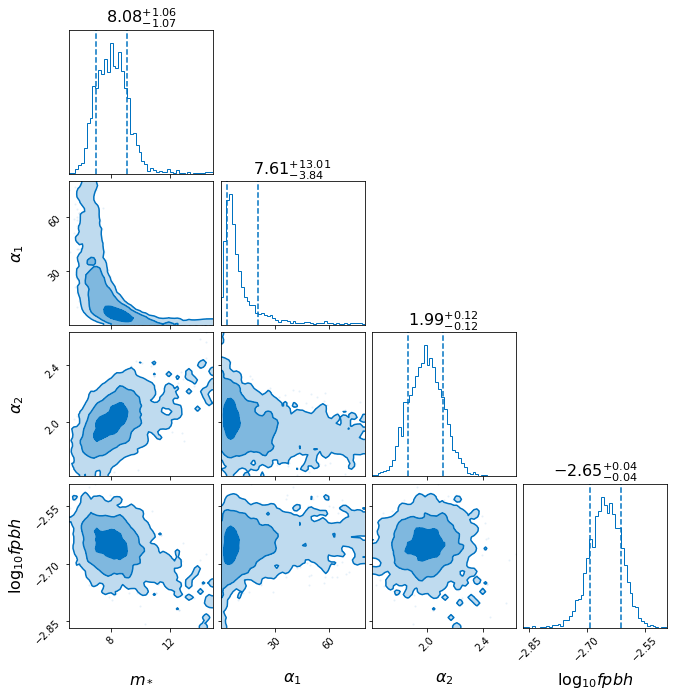

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
